![alternatvie text](https://logodownload.org/wp-content/uploads/2019/06/google-play-logo.png)

# Exploratory Data Analysis:

The analysis relies on several libraries, namely Pandas, Numpy, Matplotlib, Seaborn, and Opendatasets. The dataset used in this project is the Google Playstore dataset, which encompasses information on more than 100,000 apps in the Play Store. The dataset's size is 207 MB (unzipped 645 MB) and is sourced from Kaggle.

The project's objective is to explore and understand EDA concepts, with a focus on delivering insights that help developers better understand customer demands, and thereby popularize their apps. The project is structured as follows:

1. Download the dataset from Kaggle.
2. Prepare and clean the data.
3. Conduct exploratory analysis and visualizations.
4. Address questions and provide answers.
5. Summary and Conclusion.

## 1. Download the dataset from the Kaggle:

To begin, we’ll download the dataset.

Google-Play-store-Dataset https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

Let’s install and import the libraries

In [1]:
! pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Establishing connection from Kaggle and downloading the data. Also putting **force=True** if data was already is the system to redownload:

In [3]:
import opendatasets as od 
url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(url, force=True)

100%|███████████████████████████████████████████████████████████████████████████████| 207M/207M [00:33<00:00, 6.51MB/s]


We’ve downloaded the dataset. Installed and imported the libraries.

## 2. Data Preparation and Cleaning:

In this section, we will import the dataset into a data frame and examine its rows and columns. We'll use descriptive statistics to gain a better understanding of the dataset's features and record our observations, identify any missing values, and detect duplicate rows. We'll accomplish this by utilizing pandas to read and manipulate the dataset.

In [4]:
df = pd.read_csv('./google-playstore-apps/Google-Playstore.csv')

In [28]:
import dtale
dtale.show(df)

In [ ]:
#df.describex

### Insight

- The dataset having   2312944 rows and 24 columns 
- The columns in the dataset are:
 
        'App Name', 'App Id', 'Category', 'Rating', 'Rating Count, Installs','Minimum Installs', 'Maximum Installs', 'Free', 'Price', 
        'Currency','Size', 'Minimum Android', 'Developer Id', 'Developer Website','Developer Email', 'Released', 'Last Updated', 
        'Content Rating','Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice','Scraped Time'

### Descriptive Statistics:

In [6]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


### Missing data:

In [7]:
df.isnull().sum().sort_values(ascending=False)

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating                22883
Rating Count          22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  2
App Id                    0
Price                     0
Free                      0
Maximum Installs          0
Last Updated              0
Content Rating            0
Category                  0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

## 3. Exploratory Analysis and Visualizations:
In this exercise, we will analyze every attribute (including both numerical and categorical), create visual representations, handle missing data, and record our findings.

### Missing values visualization:

Text(0.5, 1.0, 'Missing null values')

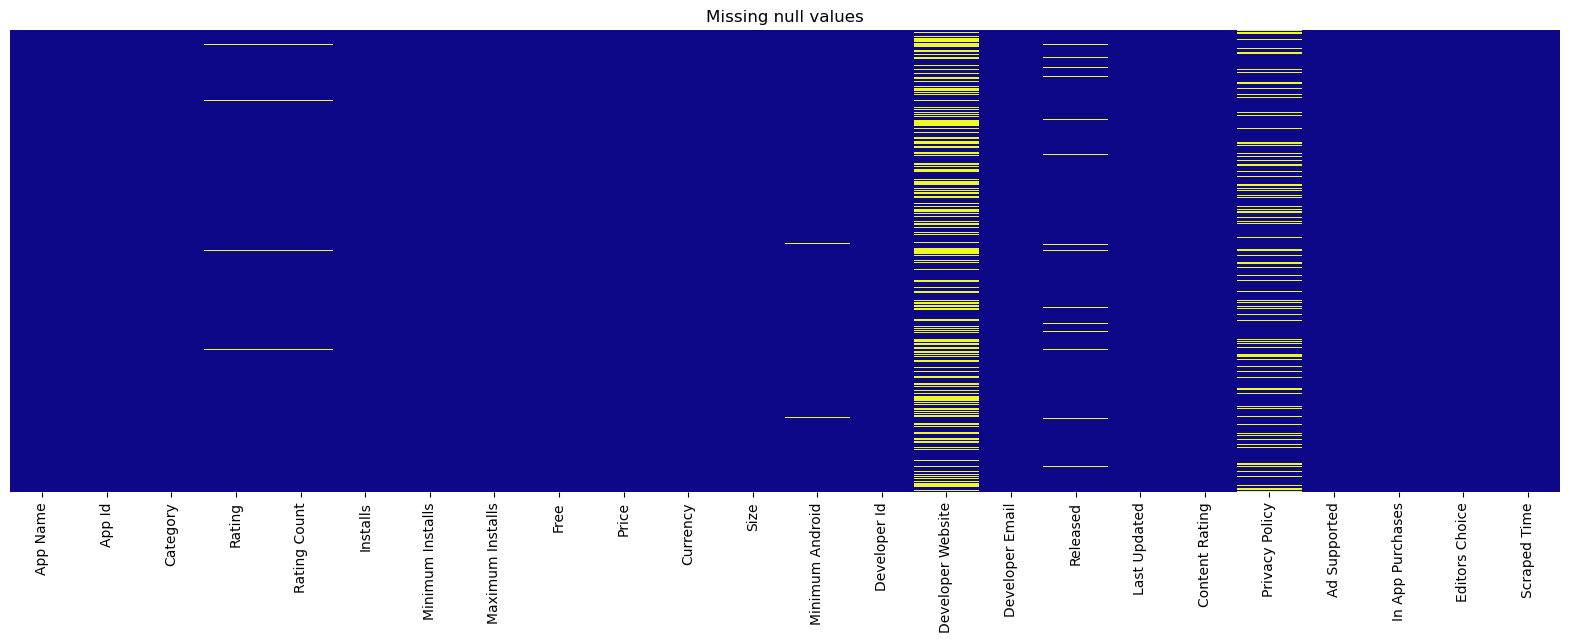

In [8]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,6)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False , cmap = 'plasma')
plt.title("Missing null values")

### Missing values plot in percentage:

Text(0.5, 1.0, 'Missig percentage of null values')

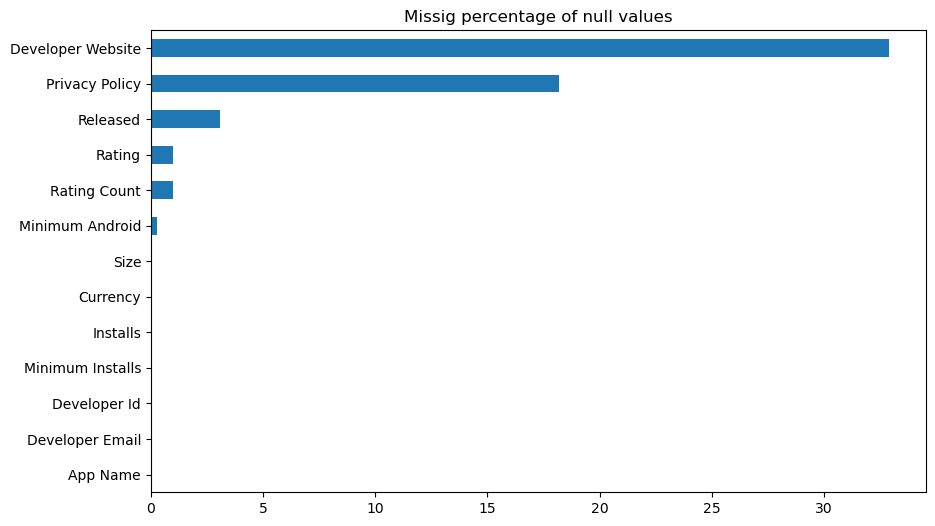

In [9]:
missing_perc = df.isnull().sum().sort_values(ascending=True)/len(df)*100
plotmiss = missing_perc[missing_perc!=0]

mpl.rcParams['figure.figsize'] = (10,6)
plotmiss.plot(kind = 'barh')
plt.title("Missig percentage of null values")

### Insight:

Dealing with the null values

The columns having highest percentage of null values are :

1. Developer Website
2. Privacy Policy

We can discard these two columns as they may not be significant. Later on in the analysis, we can also eliminate or include additional attributes in the dataset.

We can drop the small null values for the columns

1. Size
2. Currency
3. Installs
4. Minimum Installs
5. Developer Id
6. Developer Email

### Dropping the null values:

In [10]:
df.dropna(subset = ['App Name','Size','Currency','Installs','Minimum Installs','Developer Id','Developer Email'], inplace = True)

### Let’s Explore the each feature:

**Installs** feature: This feature has the information about how many installations has done for each Application in Google play store dataset.

In [11]:
df['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

It is observed that the data of “Installs” feature, it is in object type. We need to convert it into integer type. Because the number of installations should be a integer. Al so“+” symbol and “ , ” (comma) should be removed and then converted it into the integer type. 

In [12]:
df['Installs'] = df['Installs'].str.split('+').str[0]
df['Installs'].replace(',','', regex=True, inplace=True)
df['Installs'] = df['Installs'].astype(np.int64)
df['Installs']

0              10
1            5000
2              50
3              10
4             100
            ...  
2312939    100000
2312940       100
2312941       100
2312942      1000
2312943       100
Name: Installs, Length: 2312548, dtype: int64

Checking any duplicates in the **App Name**

In [13]:
df['App Name'].duplicated().any()

True

From the below cell output we can see that App Name column has multiple rows. Let's check out that data in those rows is identical or not

In [14]:
df['App Name'].value_counts()

Tic Tac Toe                     382
Calculator                      261
Flashlight                      256
BMI Calculator                  201
Age Calculator                  190
                               ... 
Foodiz Resto                      1
Astra OtoReward                   1
MedTerm Dictionary                1
Urban garden and sowing.          1
Biliyor Musun - Sonsuz Yarış      1
Name: App Name, Length: 2177593, dtype: int64

In [15]:
df['App Id'].duplicated().any()

False

   We have the Apps with the same names but with the unique App IDs so the Apps are differed based on the App IDs

Cheking **Currency** and **Size** columns:

In [16]:
df['Currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'RUB', 'SGD', 'AUD', 'PKR', 'ZAR'], dtype=object)

In [17]:
df['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

The Size of data can be in GB, MB and KB let's convert the data into the size in MB

In [18]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [19]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

ValueError: could not convert string to float: '1,018'

In this case, we have encountered a discrepancy where we obtained a value of 1,018. We have two options: we can remove it entirely from the dataset, or we can consider the possibility that it may have been a typographical error and assume it was meant to be a dot '.' instead of a comma ','. For the time being, let's assume it was a dot and replace the comma with a dot.

In [20]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [21]:
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

Another missmatch value in the data set can be seen which is 'Varies with device' it means the size of the App may varies with the device. But it can be assumed it is equal to 0.

In [22]:
df['Size'].value_counts()['Varies with device']

74704

So, there is a lot of such type of variable that should be corrected.

In [23]:
df['Size'] = df['Size'].apply(lambda x: x==0.0 if 'Varies with device' in str(x) else x)

Now type of the column can be easily changed.

In [24]:
df['Size'].astype(float)

0          10.0
1           2.9
2           3.7
3           1.8
4           6.2
           ... 
2312939    77.0
2312940    44.0
2312941    29.0
2312942    10.0
2312943     5.2
Name: Size, Length: 2312548, dtype: float64

Checking **Free** column

In [25]:
df['Free']

0          True
1          True
2          True
3          True
4          True
           ... 
2312939    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: Free, Length: 2312548, dtype: bool

The 'Free' attribute is currently in Boolean format, but for better analysis, we should change 'True' and 'False' to 'Free' and 'Paid' respectively. This modification will make it more convenient to utilize this feature in future analyses.

In [26]:
df['Type'] = np.where(df['Free'] == True,'Free','Paid')
df.drop(['Free'],axis=1, inplace= True )

Checking **Content Rating** column

In [27]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Insight:

There is less categories in the Content Rating column. So it can be put into  3 simple categories for better understanding :

1. Everyone
2. Teen
3. Adults

- Mature 17+ -> to Adults
- Everyone 10+ -> to Teen
- Unrated -> to Everyone
- Adults only 18+ -> to Adults

In [28]:
df["Content Rating"]=df["Content Rating"].replace("Unrated","Everyone")
df["Content Rating"]=df["Content Rating"].replace("Everyone 10+","Teen")
df["Content Rating"]=df["Content Rating"].replace("Mature 17+","Adults")
df["Content Rating"]=df["Content Rating"].replace("Adults only 18+","Adults")

Checking **Rating Count** column

In [29]:
df['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

We can classify the count as follows:

- A count of 0 can be categorized as 'No rating'.
- Counts less than 1000 can be classified as 'Less than 10k'.
- Counts between 10,000 and 500,000 can be categorized as 'Between 10k and 500k'.
- Counts exceeding 500,000 can be classified as 'More than 500k'.

This categorization will assist in grouping and analyzing the data more efficiently.

In [30]:
df['Rating Type'] = 'No Rating'
df.loc[(df['Rating Count'] > 0) & (df['Rating Count'] <= 10000.0),'RatingType'] = 'Less than 10K'
df.loc[(df['Rating Count'] > 10000) & (df['Rating Count'] <= 500000.0),'RatingType'] = 'Between 10K and 500K'
df.loc[(df['Rating Count'] > 500000) & (df['Rating Count'] <= 300000000000.0),'RatingType'] = 'More than 500K'
df.RatingType.value_counts()

Less than 10K           1192801
Between 10K and 500K      35779
More than 500K             1665
Name: RatingType, dtype: int64

## 4. Address Questions and Provide Answers

Following questions can be asked in order to get insight from the data:

1. What are the top 10 Categories that are installed from the Google Play Store?

2. Which top 10 Categories in play store has highest count?

3. What is the highest rated Category ?

4. Which Category has the highest Paid and Free apps?

5. How does the size of the Application impacts the Installation?

6. What are the Top 5 Paid Apps based With highest ratings and installs?

7. What are the Top 5 Free Apps based With highest ratings and installs?

### Q1. What are the top 10 Categories that are installed from the Google Play Store?

In [31]:
df['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [32]:
top_Category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'}).sort_values(by = ['Count'],ascending = False)

In [33]:
top_Category.head(5)

,Category,Count
0,Education,241068
1,Music & Audio,154897
2,Tools,143971
3,Business,143749
4,Entertainment,138261


In [34]:
Category_installs = df.groupby(['Category'])[['Installs']].sum()

In [35]:
top_Category_installs = pd.merge(top_Category, Category_installs, on='Category')
top_Category_installs.head(5)

,Category,Count,Installs
0,Education,241068,5983815847
1,Music & Audio,154897,14239401798
2,Tools,143971,71440271217
3,Business,143749,5236661902
4,Entertainment,138261,17108397933


In [36]:
top_10_Categories_installs = top_Category_installs.head(10).sort_values(by = ['Installs'],ascending = False)

<AxesSubplot:title={'center':'Top 10 Installed Categories'}, xlabel='Category', ylabel='Installs'>

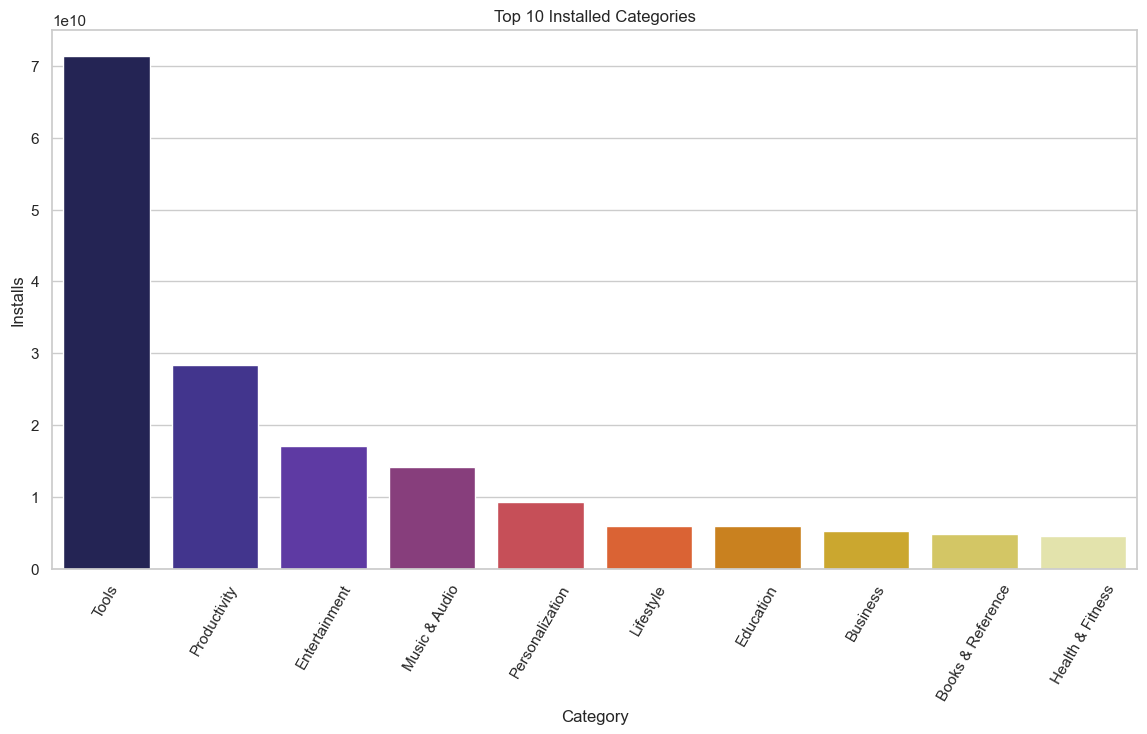

In [84]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Installed Categories")
sns.barplot(x = top_10_Categories_installs.Category,y = top_10_Categories_installs.Installs, palette = "CMRmap")


### A1. Tools, Productivity, Entertainment, Music & Audio, Personalization, Lifestyle, Education, Business, Books & Reference, Health & Fitness

### Q2. Which top 10 Categories in play store has highest count?

<AxesSubplot:title={'center':'Top 10 Categories'}, xlabel='Category', ylabel='Count'>

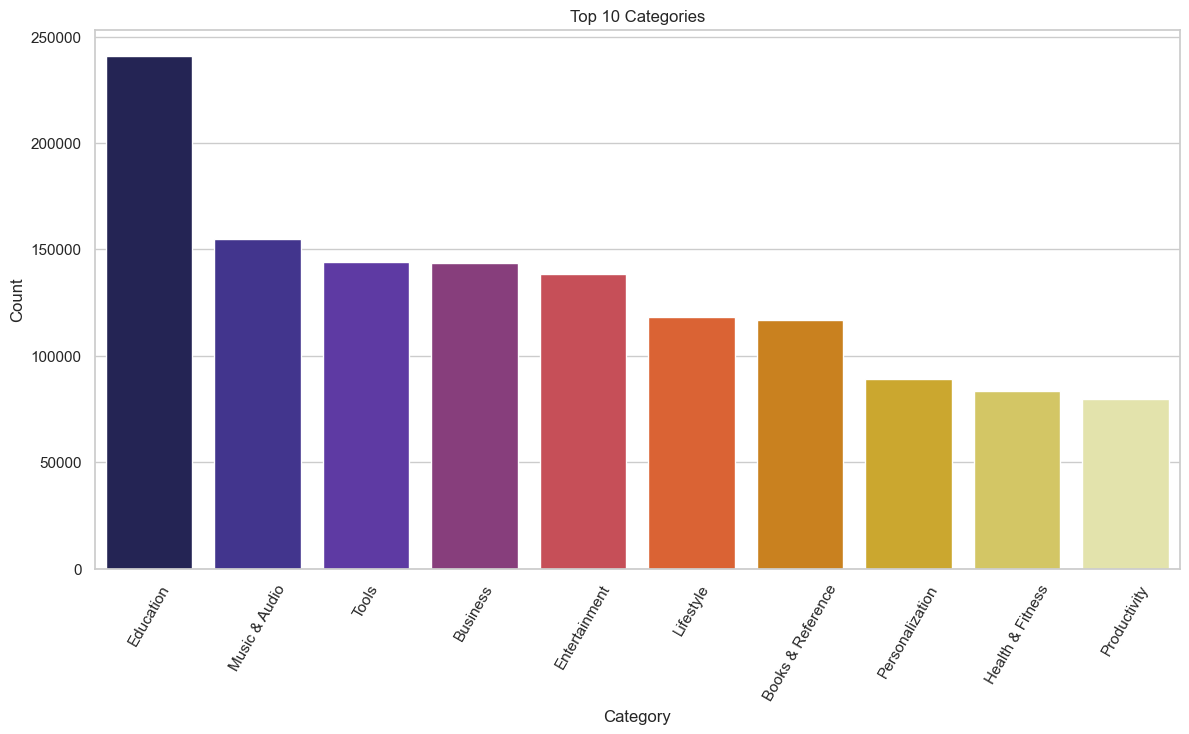

In [78]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("Category")
plt.ylabel("Number of applications")
plt.title("Top 10 Categories")
sns.barplot(x = top_Category.head(10).Category, y = top_Category.Count, palette = "CMRmap")

### A2. Education, Music & Audio, Tools, Business, Entertainment, Lifestyle, Books & Reference, Personalization, Health & Fitness, Productivity.

### Q3. What is the highest rated Category?

<AxesSubplot:title={'center':'All Categories Rating '}, xlabel='Category', ylabel='Rating'>

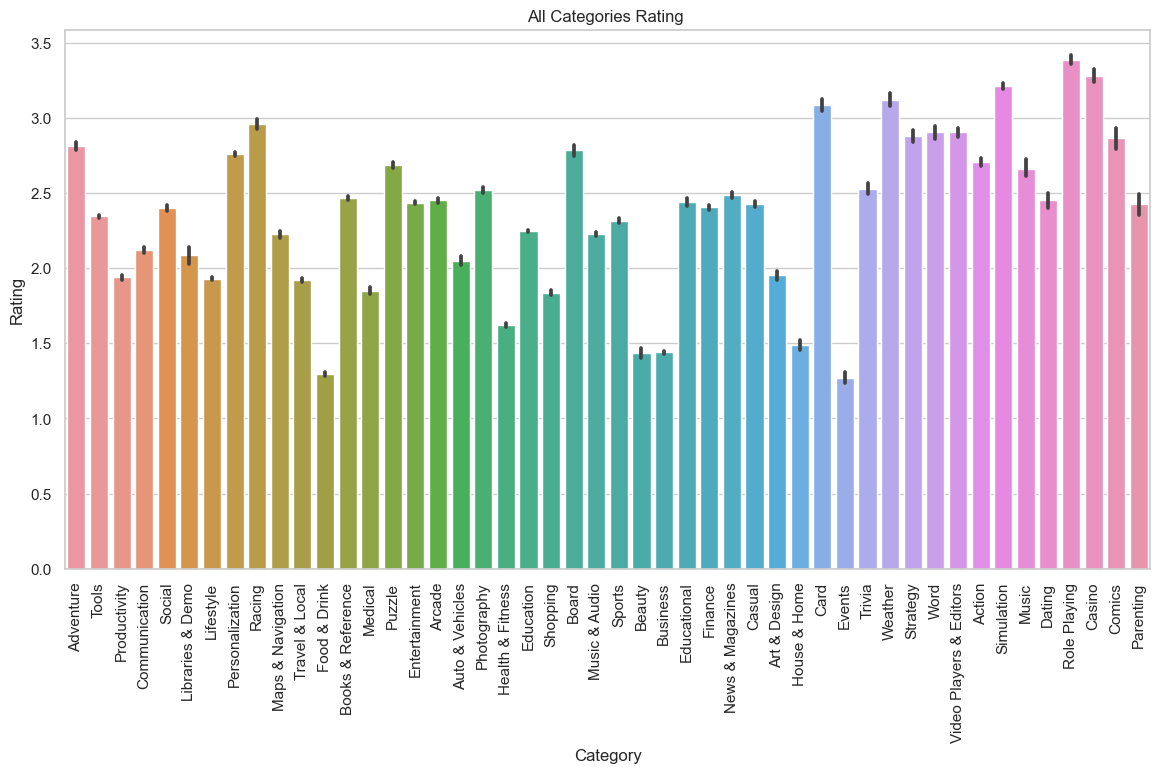

In [110]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Highest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.Category,y = df.Rating)

### A3. From the above plot we can see that Role Playing is the highest Rated category

Also we can further explore Rating category:

Text(0.5, 1.0, 'Distribution of Rating')

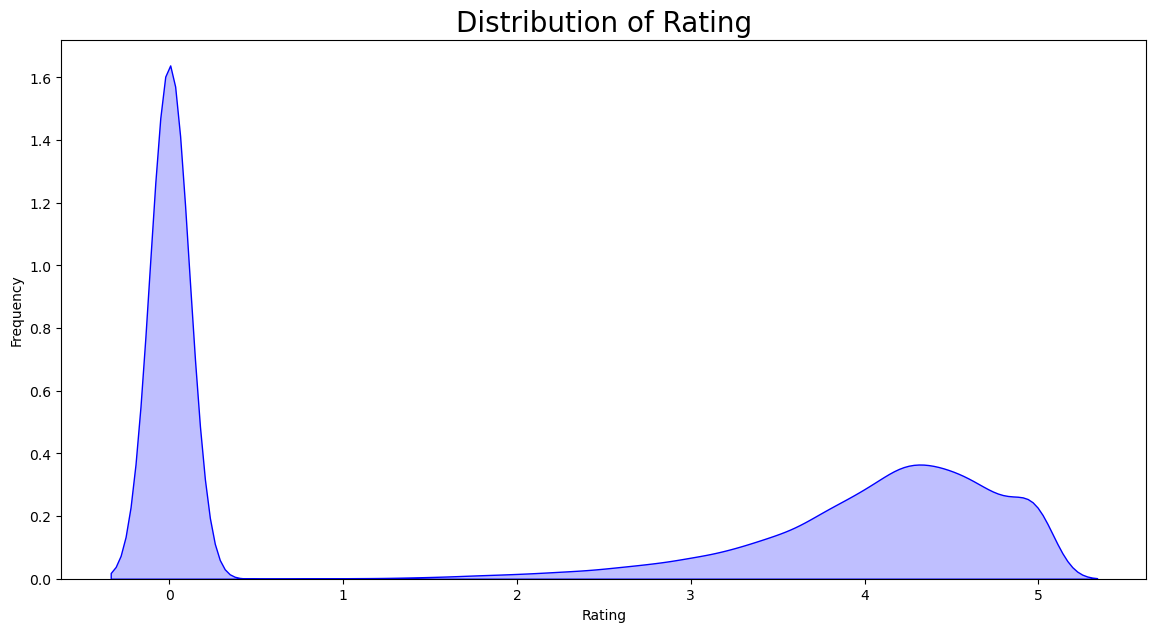

In [42]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

<AxesSubplot:title={'center':'Rating'}, xlabel='Rating', ylabel='Count'>

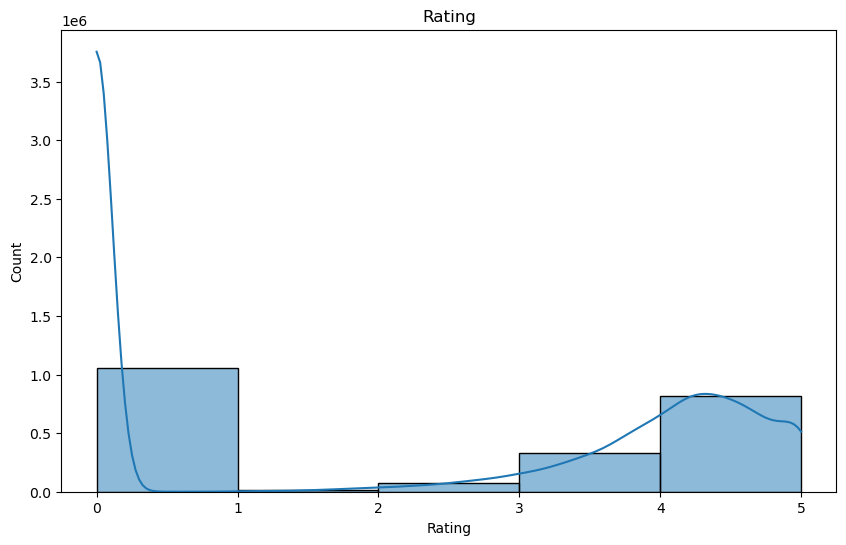

In [43]:
plt.title("Rating")
sns.histplot(df.Rating,kde=True,bins=5)

Based on the two graphs shown above, it is evident that the majority of people do not rate the apps. However, another significant observation is that people tend to give a rating of 4 or higher most frequently.

<AxesSubplot:title={'center':'Content Rating and Maximum installations '}, xlabel='Maximum Installs', ylabel='Rating Count'>

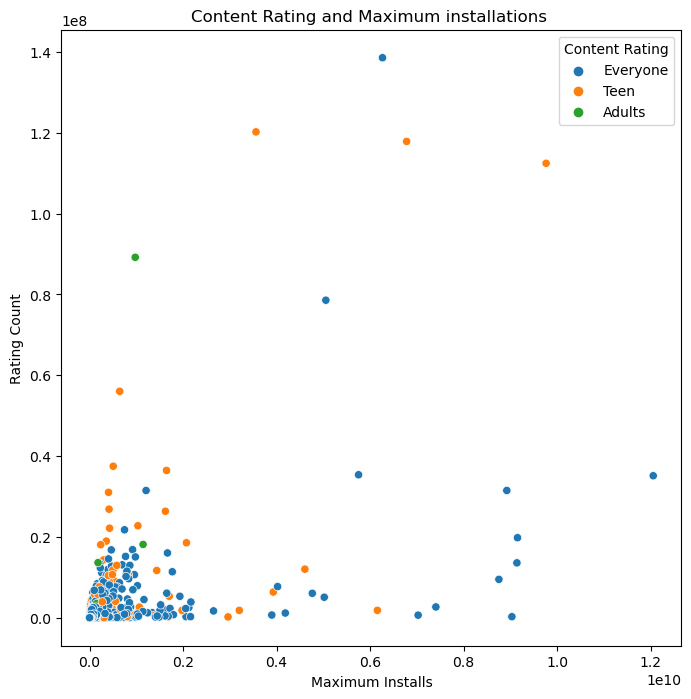

In [44]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x='Maximum Installs',y='Rating Count',data=df,hue='Content Rating')

#### Insight:
This scatterplot shows us that: If we exclude everyone from the plot and when focus on Teen and Adults we can see that teens have much engagement in terms of download and rating count.

### Q4. Which Category has the highest Paid and Free apps?

In [45]:
app_count = df.groupby(['Category','Type'])[['App Name']].count().reset_index().rename(columns={'App Name':'Count','index':'App Name'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
df_app_count.head(10)

Type,Category,Free,Paid
0,Action,26953,586
1,Adventure,22211,982
2,Arcade,53016,763
3,Art & Design,18364,172
4,Auto & Vehicles,17994,282
5,Beauty,11757,14
6,Board,10223,364
7,Books & Reference,113119,3597
8,Business,143079,670
9,Card,7891,284


Text(0.5, 1.0, 'Free and Paid Apps in Category')

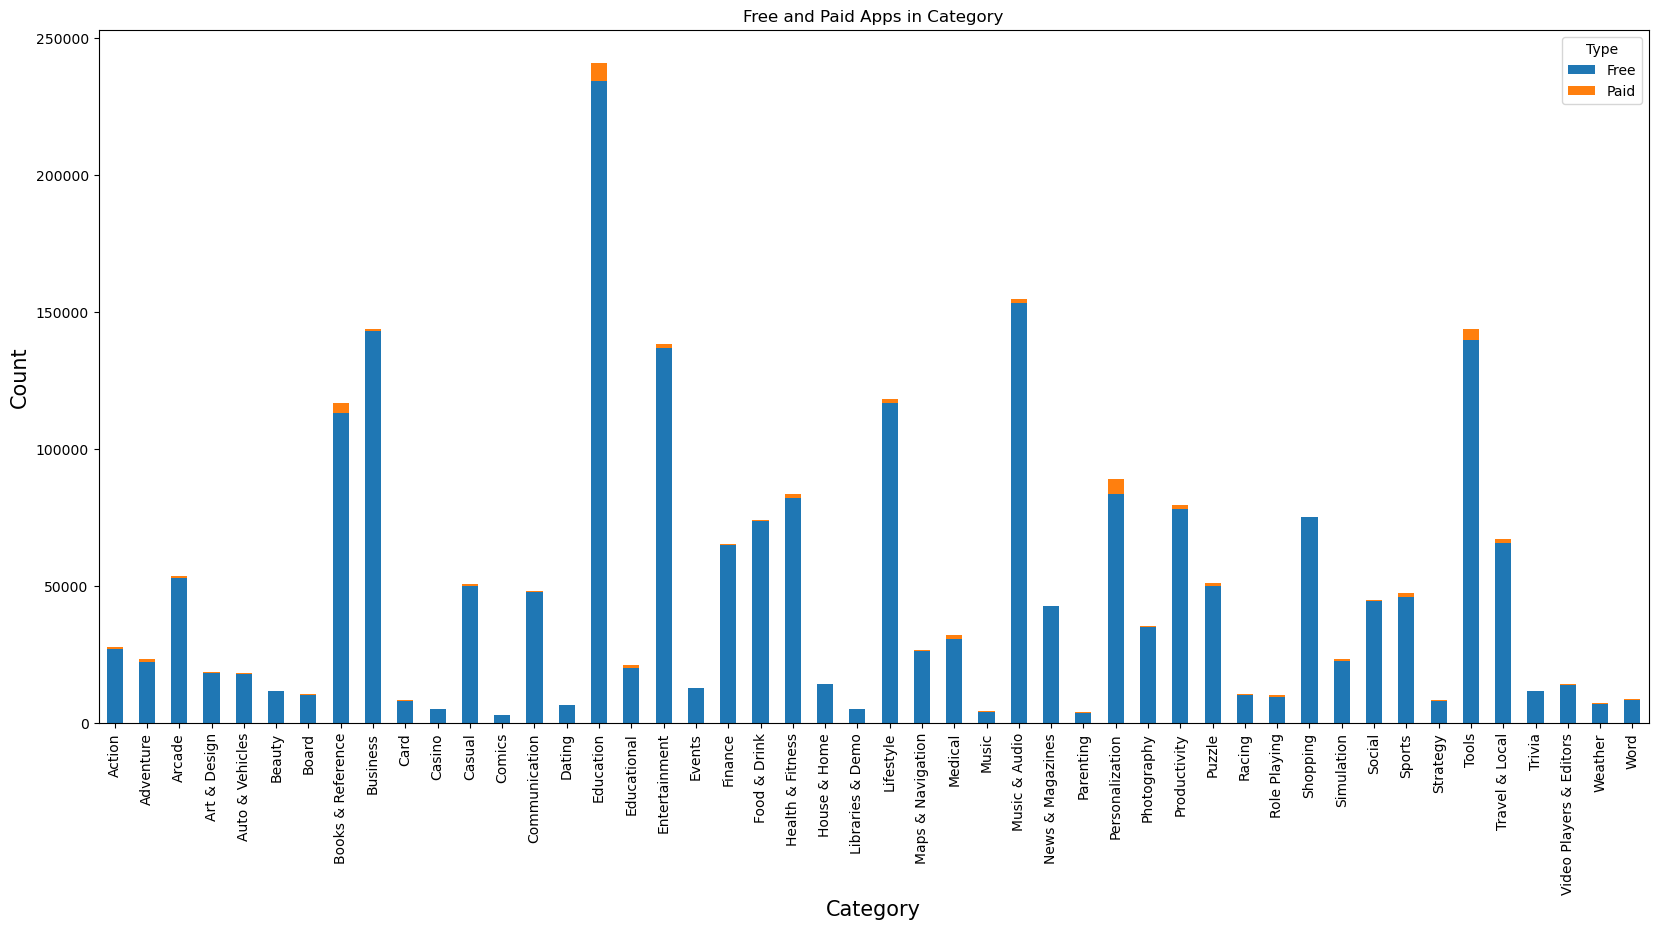

In [46]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(20,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Free and Paid Apps in Category")

### A4. Education Category is the highest in paid apps list

#### Insight: 

Upon analyzing the dataset, it appears that some categories of apps have a higher proportion of free apps compared to others. In particular, the majority of apps in the Business, Education, Music & Audio, Tools, and Social categories were available for free installation. However, the Books & References, Education, Tools, and Personalization categories had a larger number of paid apps available for download.

Visualizing the Installation Types in each category :

In [47]:
df['Installs'].min(), df['Installs'].max()

(0, 10000000000)

The number of installs exhibits a high degree of variance, which can make it difficult to visualize the data effectively. To address this issue, it would be advisable to apply a log transformation to this column. This will reduce the variance and allow for more meaningful visualization of the data.

In [48]:
categoty_type_installs = df.groupby(['Category','Type'])[['Installs']].sum().reset_index()
categoty_type_installs['log_Installs'] = np.log10(categoty_type_installs['Installs'])

<AxesSubplot:title={'center':'Number of installed Apps type wise according to Category'}, xlabel='Category', ylabel='log_Installs'>

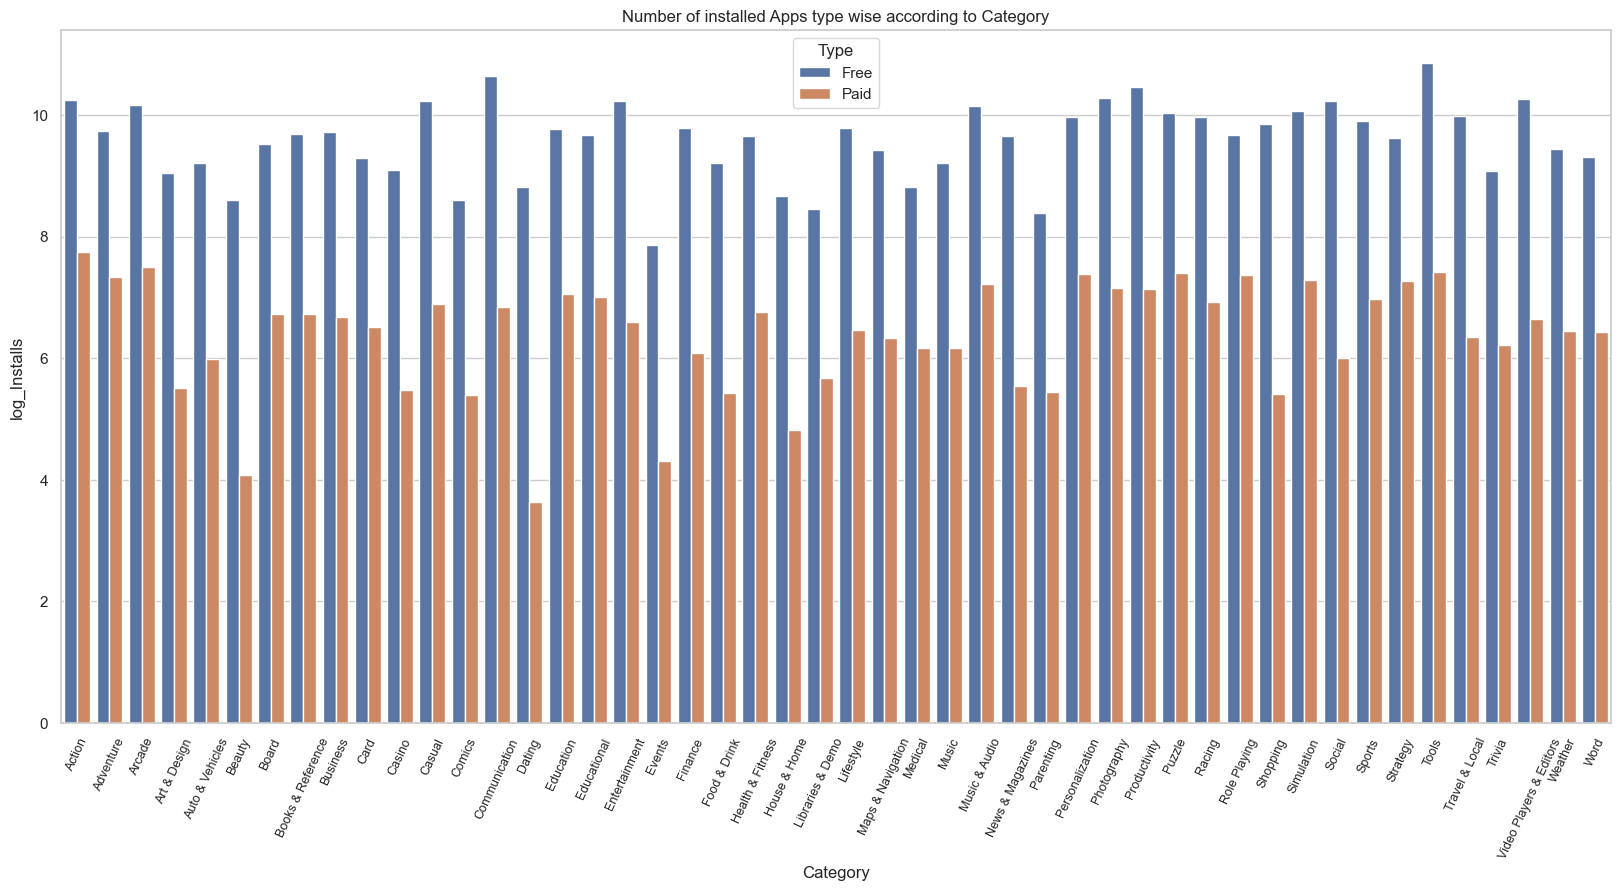

In [111]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=65,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot(x= 'Category',y='log_Installs', hue='Type', data=categoty_type_installs)

### Q5. How does the size of the Application impacts the Installation ?

In [50]:
df['log_Installs'] = np.log10(categoty_type_installs['Installs'])

<AxesSubplot:title={'center':'Impact of Application Size in Installation'}, xlabel='Size', ylabel='Installs'>

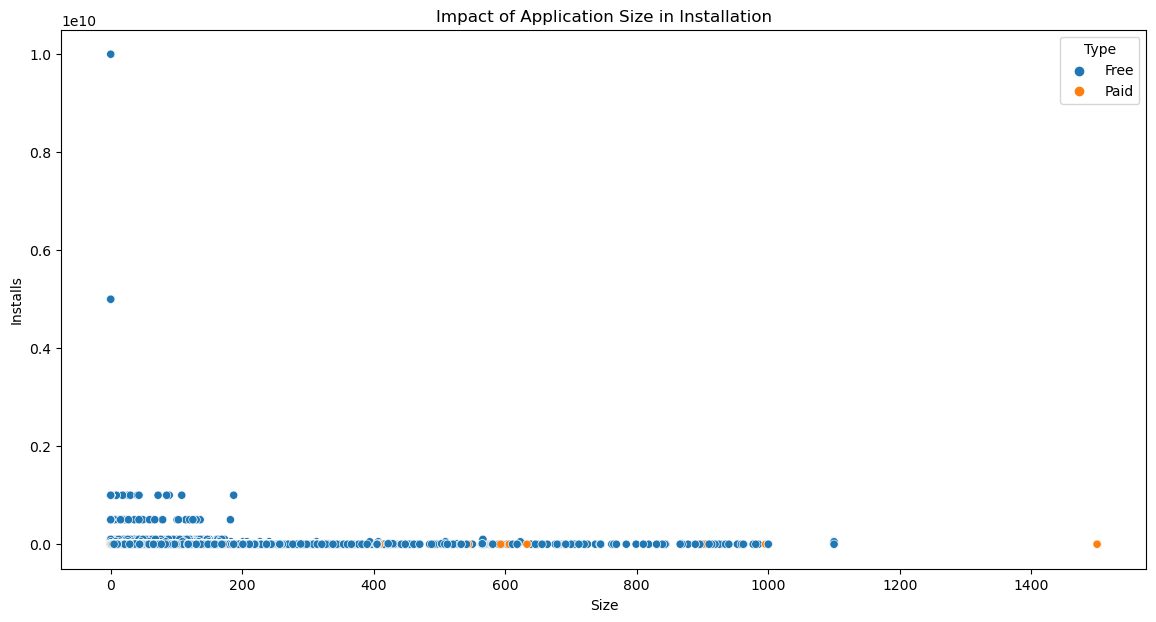

In [51]:
df['AppSize'] = df['Size'].astype(np.float16)

plt.figure(figsize=(14,7))
plt.xlabel("Size")
plt.ylabel("Installs")
plt.title("Impact of Application Size in Installation")
sns.scatterplot(x = 'AppSize',y = 'Installs', hue = 'Type', data=df)

### A5. Based on the plot above, it is evident that the size of an application has an impact on the number of installations. Apps with larger sizes are less frequently installed by users.

Let's see some correlations

In [52]:
df.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Price,Ad Supported,In App Purchases,Editors Choice,log_Installs,AppSize
Rating,1.000000,0.013038,0.011215,0.011215,0.012615,-0.003674,0.160503,0.153824,0.019485,-0.023632,0.046099
Rating Count,0.013038,1.000000,0.545281,0.545281,0.547571,-0.000411,0.005294,0.025737,0.137311,0.076834,0.013600
Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932,0.077248,0.004240
Minimum Installs,0.011215,0.545281,1.000000,1.000000,0.954037,-0.000461,0.002249,0.014178,0.059932,0.077248,0.004240
Maximum Installs,0.012615,0.547571,0.954037,0.954037,1.000000,-0.000515,0.002881,0.016100,0.064206,0.079792,0.005093
Price,-0.003674,-0.000411,-0.000461,-0.000461,-0.000515,1.000000,-0.034281,-0.002636,0.000503,NaN,0.004160
Ad Supported,0.160503,0.005294,0.002249,0.002249,0.002881,-0.034281,1.000000,0.138304,0.005701,0.140935,-0.042772
In App Purchases,0.153824,0.025737,0.014178,0.014178,0.016100,-0.002636,0.138304,1.000000,0.046078,-0.021114,0.165194
Editors Choice,0.019485,0.137311,0.059932,0.059932,0.064206,0.000503,0.005701,0.046078,1.000000,NaN,0.039926
log_Installs,-0.023632,0.076834,0.077248,0.077248,0.079792,NaN,0.140935,-0.021114,NaN,1.000000,0.024326


<AxesSubplot:>

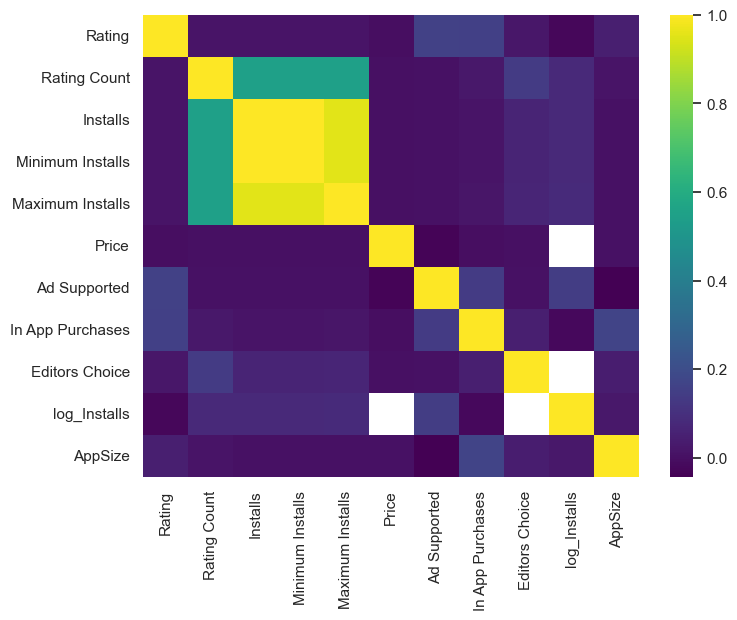

In [114]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar= True, cmap='viridis')

#### Insight:
There is a correlation between certain factors such as AdSupport and InappPurchases with app ratings. Apps that offer customer support and subscription plans tend to have higher ratings and engage more customers. Additionally, the graph indicates that Editor's Choice plays an important role, with apps that have received high Editor's Choice ratings also having higher ratings count and higher installs.

### Q6. What are the Top 5 Paid Apps based With highest ratings and installs?

In [54]:
paid_apps = df[(df.Type=='Paid') & (df.Installs >= 5000000)]
paid_apps = paid_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)

<AxesSubplot:title={'center':'Top 5 Paid Rated Apps'}, xlabel='Rating', ylabel='App Name'>

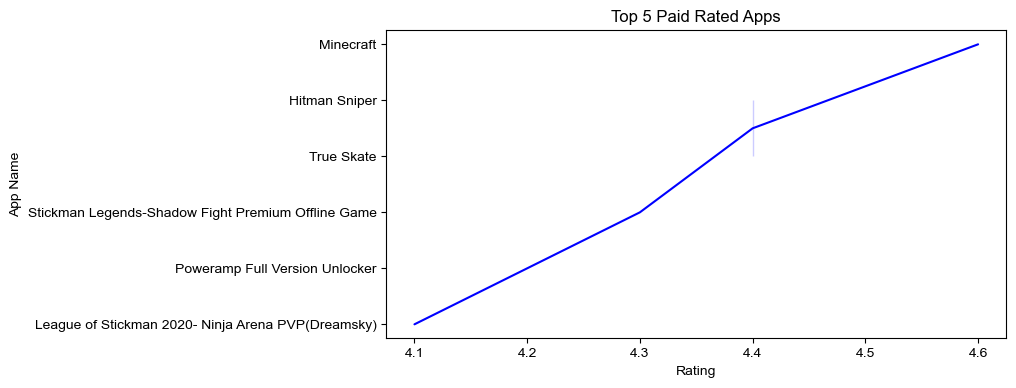

In [55]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Paid Rated Apps")
sns.lineplot(x=paid_apps.values,y=paid_apps.index,color='Blue')

### A6. Minecraft, Hitman Sniper, True Skate, Stickman Legends-Shadow Fight Premium Offline Game, Poweramp Full Version Unlocker, League of Stickman 2020- Ninja Arena PVP(Dreamsky)

### Q7. What are the Top 5 Free Apps based With highest ratings and installs ?

In [56]:
free_apps = df[(df.Type=='Free') & (df.Installs >= 5000000)]
free_apps = free_apps.groupby('App Name')['Rating'].max().sort_values(ascending = False)
free_apps = free_apps.head(5)

<AxesSubplot:title={'center':'Top 5 Free Rated Apps'}, xlabel='Rating', ylabel='App Name'>

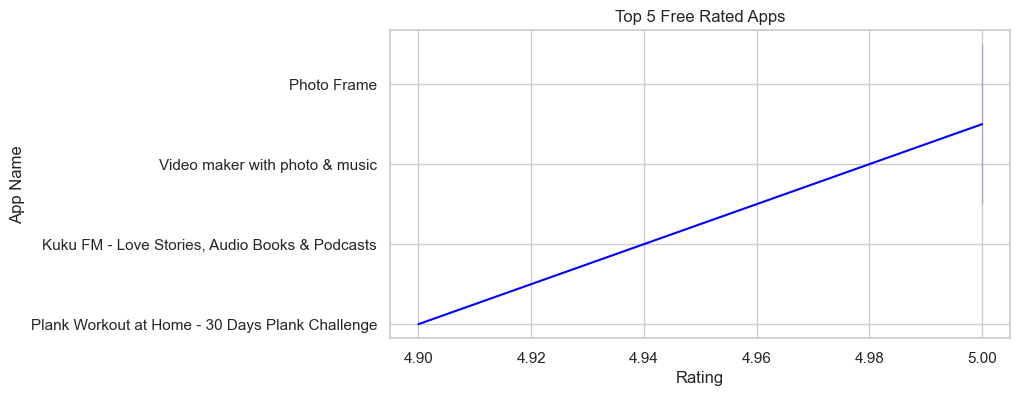

In [57]:
plt.figure(figsize=(8,4))
plt.xlabel("Rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x = free_apps.values, y = free_apps.index,color = 'Blue')

### A7. Photo Frame, Video maker with photo & music, Kuku FM - Love Stories,Audio Books & Podcasts, Plank Workout at Home.

### Visualizing the categories that have the Top 10 Max Installations in a pie chart :

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

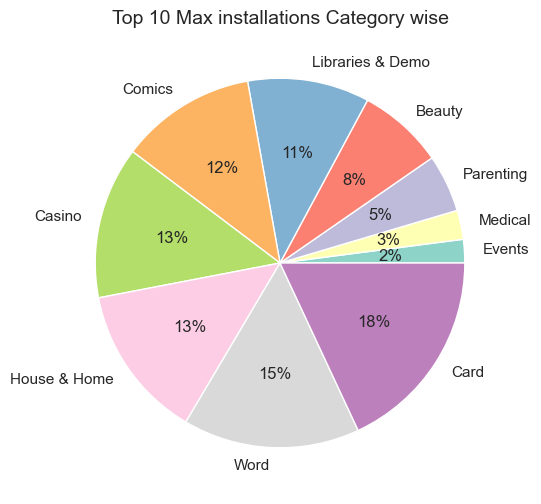

In [95]:
plt.figure(figsize=(8,6))
data = df.groupby('Category')['Maximum Installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels=labels,  autopct='%.0f%%', colors=sns.color_palette('Set3')) 
plt.title("Top 10 Max installations Category wise", fontsize=14)

### Visualize the Top 10 installation Categories that Adults have installed the most

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

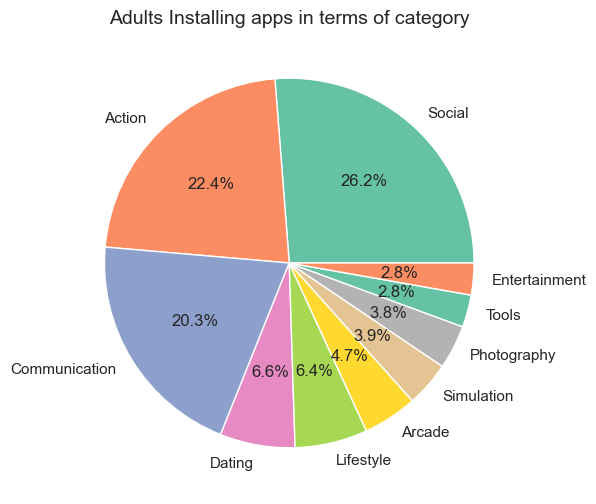

In [96]:
plt.figure(figsize=(8,6))
Adult = df[(df['Content Rating']=='Adults')]
Adult = Adult.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels, colors=sns.color_palette('Set2'))
plt.title("Adults Installing apps in terms of category", fontsize=14)

#### Insight:
Most of the Adults showing intrest in downloading the Social, Action and Communication Category.

### Visualizing Teens Installing the apps in terms of Category :

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

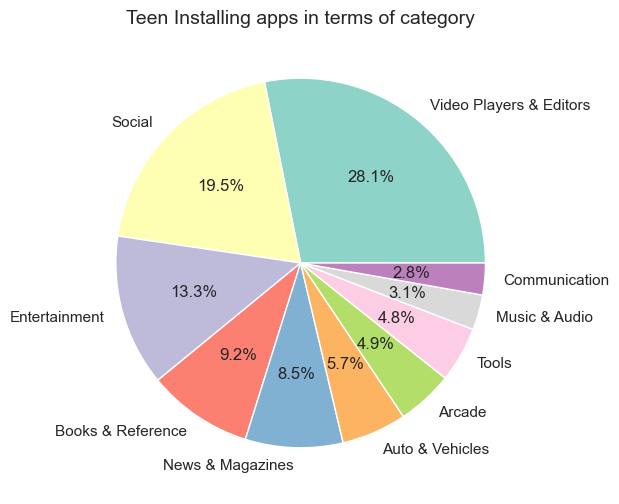

In [98]:
plt.figure(figsize=(8,6))
Teen = df[(df['Content Rating']=='Teen')]
Teen = Teen.groupby(['Category'])['Maximum Installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x = Teen, autopct="%.1f%%", labels=labels, colors=sns.color_palette('Set3'))
plt.title("Teen Installing apps in terms of category", fontsize=14)

## 5. Summary and Conclusion :
- There is a greater inclination among people to install gaming apps, which tend to receive higher ratings. 
- In-app purchases have a positive correlation with app ratings, so providing customer support and subscription plans can help engage users. 
- While many people do not rate apps, those who do tend to give a rating of 4 stars or more. 
- Adults mostly install social and communication apps, whereas teens are responsible for most installations, primarily of video players and editors due to high demand. 
- App size affects the number of installations. 
- Free apps are the most commonly downloaded, and their availability is also high.





### Future Work :
There are several ways we can conduct further analysis on this dataset, including examining the Minimum Android, Last updated, and Released columns and analyzing their relationship with the rating. We can also investigate each category and determine which app has the highest rating within each category. Another approach is to explore the developer email and website columns, comparing apps with and without provided developer emails to gain insights related to rating and customer service.

### References :
1. https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
2. https://pandas.pydata.org/docs/user_guide/index.html
3. https://numpy.org/doc/stable/user/basics.html
4. https://matplotlib.org/stable/index.html
5. https://seaborn.pydata.org/

In [61]:
pip install jovian --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [62]:
import jovian

# Machine Learning
Sure, here's a machine learning problem statement based on the Play Store app download dataset:

Problem Statement: Predicting the Rating of Android Apps in the Google Play Store

Dataset Description: The Google Play Store dataset contains information on more than 100,000 apps available for download on the Play Store. The dataset includes information on the app's category, rating, size, number of downloads, and price, among other features.

Objective: To predict the rating of Android apps in the Google Play Store based on their features.

Approach: We will use supervised machine learning algorithms to predict the rating of the Android apps. We will use the following steps:

1. Data Preprocessing: We will preprocess the data by removing any missing values, outliers, or irrelevant features. We will also transform the categorical variables into numerical variables.

2. Data Exploration: We will explore the data using descriptive statistics and data visualization techniques to gain insights into the data.

3. Feature Engineering: We will engineer new features from the existing features to improve the performance of the model.

4. Model Selection: We will select the appropriate machine learning algorithm(s) based on the type of data, the number of features, and the size of the dataset. We will experiment with different algorithms such as Linear Regression, Random Forest, and Gradient Boosting to find the best-performing model.

5. Model Evaluation: We will evaluate the performance of the models using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared (R2).

6. Model Deployment: We will deploy the final model as a web application that allows users to input the features of an Android app and get the predicted rating.

Data Source: The dataset can be downloaded from Kaggle at the following link: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

In [ ]:
import opendatasets as od 
url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(url, force=True)
df.columns=[x.lower() for x in df.columns]

In [17]:
df.head(10).T

,0,1,4,5,9,11,12,13,14,15
app name,Gakondo,Ampere Battery Info,GROW.me,IMOCCI,Neon 3d Iron Tech Keyboard Theme,Parents,桃園機場捷運時刻表 - 捷運轉乘路線快速查詢(支援台北捷運),be.MOBILISED,Caliway Conductor,Readymade Grocery App
app id,com.ishakwe.gakondo,com.webserveis.batteryinfo,com.horodyski.grower,com.imocci,com.ikeyboard.theme.neon_3d.iron.tech,com.eqra.android.BSTS.parent,com.jieapp.taoyuanmetro,com.hastobe.bemobilised,com.caliwayconductor.driver,com.ionicfirebaseapp.readymadegroceryuserapp
category,Adventure,Tools,Tools,Social,Personalization,Maps & Navigation,Travel & Local,Maps & Navigation,Travel & Local,Food & Drink
rating,0.0,4.4,0.0,0.0,4.7,0.0,3.9,0.0,3.7,4.2
rating count,0.0,64.0,0.0,0.0,820.0,0.0,118.0,0.0,1572.0,16.0
installs,10+,"5,000+",100+,50+,"50,000+",100+,"10,000+",100+,"10,000+","1,000+"
minimum installs,10.0,5000.0,100.0,50.0,50000.0,100.0,10000.0,100.0,10000.0,1000.0
maximum installs,15,7662,478,89,62433,330,37763,274,42856,4313
free,True,True,True,True,True,True,True,True,True,True
price,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
#df = pd.read_csv("playstore_data.csv")

# Preprocessing
categorical_features = ['Category', 'Type', 'Content Rating']
numerical_features = ['Reviews', 'Size', 'Installs', 'Price']

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(df[numerical_features+categorical_features])
y = df['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Ensemble model
er = VotingRegressor([('dt', dt), ('lr', lr)])
er.fit(X_train, y_train)
er_pred = er.predict(X_test)

# Model evaluation
print('Decision tree R2 score:', r2_score(y_test, dt_pred))
print('Linear regression R2 score:', r2_score(y_test, lr_pred))
print('Ensemble R2 score:', r2_score(y_test, er_pred))

print('Decision tree RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('Linear regression RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('Ensemble RMSE:', np.sqrt(mean_squared_error(y_test, er_pred)))

# Hyperparameter tuning
params = {'dt__max_depth': [None, 2, 4, 6, 8],
          'dt__min_samples_leaf': [1, 2, 4, 8],
          'dt__min_samples_split': [2, 4, 8, 16],
          'lr__normalize': [True, False]}

grid = GridSearchCV(er, params, cv=5)
grid.fit(X_train, y_train)

# Best hyperparameters
print('Best hyperparameters:', grid.best_params_)

# Best model
best_er = grid.best_estimator_
best_er_pred = best_er.predict(X_test)

# Model evaluation with best hyperparameters
print('Best model R2 score:', r2_score(y_test, best_er_pred))
print('Best model RMSE:', np.sqrt(mean_squared_error(y_test, best_er_pred)))

# Plot actual vs predicted ratings
plt.scatter(y_test, best_er_pred)
plt.xlabel('Actual ratings')
plt.ylabel('Predicted ratings')
plt.show()


KeyError: "None of [Index(['Reviews', 'Size', 'Installs', 'Price', 'Category', 'Type',\n       'Content Rating'],\n      dtype='object')] are in the [columns]"

In [23]:
df.columns

Index(['app name', 'app id', 'category', 'rating', 'rating count', 'installs',
       'minimum installs', 'maximum installs', 'free', 'price', 'currency',
       'size', 'minimum android', 'developer id', 'developer website',
       'developer email', 'released', 'last updated', 'content rating',
       'privacy policy', 'ad supported', 'in app purchases', 'editors choice',
       'scraped time'],
      dtype='object')